**Real estate Price prediction using Multiple linear regression** 

* Student name:**Group 19**:Alex Muturi, Angela Nyaga, Annette Kalekye, Chris Otieno              
* Student pace:part time
* Scheduled project review date/time: 11th September 2023|6:00AM
* Instructor name: Stella Waithera 
* Blog post URL:


**Overview**



**Business Problem**

 

**Data understanding**



**Loading Libraries**

In [7]:
#loading needed libraries
import pandas as pd
import numpy as np
#data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Import dataset**

In [8]:
#loading our data set for analysis and cleaning
df = pd.read_csv('kc_house_data.csv', index_col=0)
#previewing our dataset
df.head(4)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000


**Data exploration and understanding**

In [9]:
#To get an overview/summary of our dataset, this includes nn- null values and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

Interpreting the total columns and columns with missing values in the dataframe
+ The DataFrame 'kc_house_data.csv' has a total of 21597 rows and 20 columns.
+ 'waterfront' - This column has 19221 non-null entries; there are some missing values for this variable. The data type is 'object,'; it is explaining a waterfront feature of the houses.
+ 'view' - This column has 21534 non-null entries; there are some missing values for this variable. The data type is 'object,'; it is explaining houses with a view.
+ 'yr_renovated' - This column has 21534 non-null entries; there are some missing values for this variable. The data type is 'float,'; it represents the year a house was renovated.


In [10]:
#finding the statistical summary of our dataset
df.describe(include = 'all')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221,21534,21597,21597,21597.000000,21597,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
unique,372,NaN,NaN,NaN,NaN,NaN,NaN,2,5,5,11,NaN,304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,6/23/2014,NaN,NaN,NaN,NaN,NaN,NaN,NO,NONE,Average,7 Average,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,142,NaN,NaN,NaN,NaN,NaN,NaN,19075,19422,14020,8974,NaN,12826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,NaN,NaN,NaN,NaN,1788.596842,NaN,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,NaN,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,NaN,NaN,NaN,NaN,827.759761,NaN,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,NaN,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,NaN,NaN,NaN,NaN,370.000000,NaN,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,NaN,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,NaN,NaN,NaN,NaN,1190.000000,NaN,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,NaN,NaN,NaN,NaN,1560.000000,NaN,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,NaN,NaN,NaN,NaN,2210.000000,NaN,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


**Data cleaning**

+ We will identify and correct any data inconsistencies within our dataset, deal with missing values and invalid entries

In [11]:
df.isna()# Checks missing values

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
6414100192,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5631500400,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2487200875,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1954400510,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6600060120,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1523300141,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isna().sum() #to see missing value

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

+ 'view' and 'waterfront' are both categorical data types we replace their missing values using mode.The % of data missing is below 15% we do not expect that this replacement will affect our model outcome.
+ we replace 'yr_renovated' with it's median, we want to keep all our data columns, it will be useful in our modeling outcome.


In [13]:
#finding the mode of the column view 
mode_view = df['view'].mode()[0]
#replacing the missing values with the mode
df['view'].fillna(mode_view, inplace=True)

In [14]:
#finding the mode of the column view 
mode_waterfront = df['waterfront'].mode()[0]
#replacing the missing values with the mode
df['waterfront'].fillna(mode_waterfront, inplace=True)

In [15]:
#finding the median of column 'yr_renovated'
median_yr_renovated = df['yr_renovated'].median()
##replacing the missing values with the median
df['yr_renovated'].fillna(df['yr_renovated'].median(),inplace=True)

In [16]:
df.info() #confirming that our dataset is now clean

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  object 
 8   view           21597 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

+ The output above confirms there is no more missing data in each column, all missing values have been handled and our data is noe ready for further analysis.

**Exploratory Data Analysis**

+ We visualize the data to gain insights, identify patterns and understand relationshipd between the data variables.This will also prepare our data for further modeling.
+ Below is the summary of the EDA methods we have applied to our data.
**Visualization* -We have used various visualizations to better understand the distributon of our data. Bar graph, boxplots,histograms, scatterplots and heatmap.
**Identifying Outliers* -Detected outliers in the columns price, bedrooms, bathrooms and sqft_living, 
**Distribution of numeric columns* -We have used histograms to reperesent the frequency of numerical column data within our dataset, it gives an overview of distribution of values in the columns.
**Distribution of categorical columns by value counts* - we have plotted bar graphs to represent the frequency of occurence for our categorical data, this gives an overview of the most occuring aspects of qualities for these columns.
**Correlations* -We have examined the correlation of all columns against price, this will help in our model because price is our independent variable, it is paramount to understand ow all other data relates to the column price.



**Data visualization**

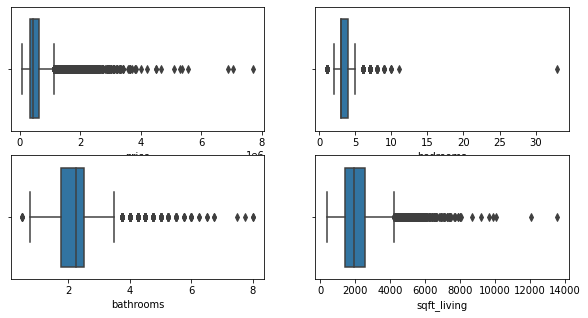

In [17]:
#finding outliers in our dataset with numerical columns
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(data = df,x='price', ax = axs[0,0])
plt2 = sns.boxplot(data = df,x='bedrooms', ax = axs[0,1])
plt3 = sns.boxplot(data = df,x='bathrooms', ax = axs[1,0])
plt4 = sns.boxplot(data = df,x='sqft_living', ax = axs[1,1])

plt.show()

+ We plotted boxplots to check for outliers in our numerical data, extreme outliers are likely
  to affect our modeling when the values are significant for continus data, 'bathrooms' and 'bedrooms' outliers may not have a     significant effect on our model.
+ Our aim is to create a model that predicts price outliers in the continous variables price and 'sqft_living' might have a       substantial impact on our model performance.
+ We deal with price and sqft_living by removing outliers

In [39]:
#removing outliers
# load existing data frame to compare shapes after removing outliers
column_name = df.columns
df = pd.DataFrame(df)
df.columns = column_name
df.head()
print("Old Shape: ", df.shape)
 
''' Detection '''
# IQR
# Calculate the upper and lower limit
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

Q1_sqft_living = df['sqft_living'].quantile(0.25)
Q3_sqft_living = df['sqft_living'].quantile(0.75)
IQR_sqft_living = Q3_sqft_living - Q1_sqft_living
#determine lower and upper bounds for outlier removal
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

lower_bound_sqft_living = Q1_sqft_living - 1.5 * IQR_sqft_living
upper_bound_sqft_living = Q3_sqft_living + 1.5 * IQR_sqft_living
#removing outliers 
df_cleaned = df[(df['price'] >= lower_bound_price) & (df['price'] <= upper_bound_price) &
                (df['sqft_living'] >= lower_bound_sqft_living) & (df['sqft_living'] <= upper_bound_sqft_living)]
print("New Shape", df.shape)

Old Shape:  (21597, 20)
New Shape (21597, 20)


+ The dataset shape remained the same, this means the outliers do not have a substancial impact in our data distribution, they     might be very extreme, they are few therefore they did not alter our data.

**Distribution of numerical columns**

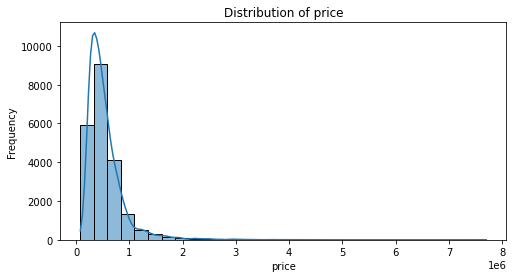

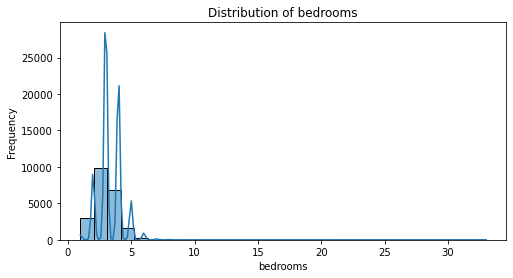

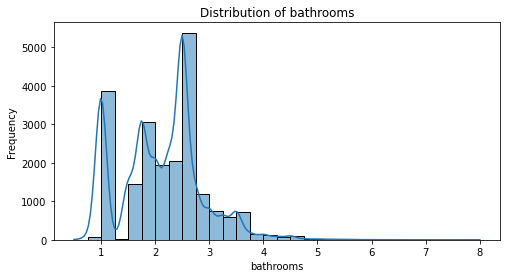

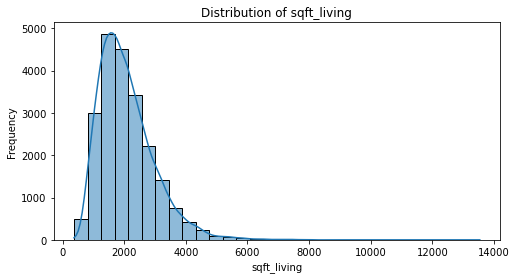

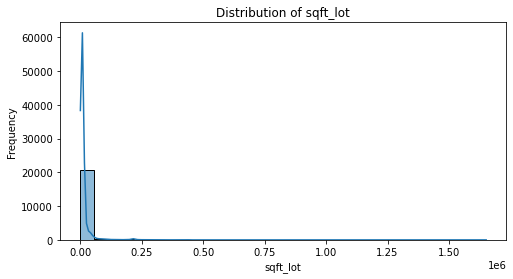

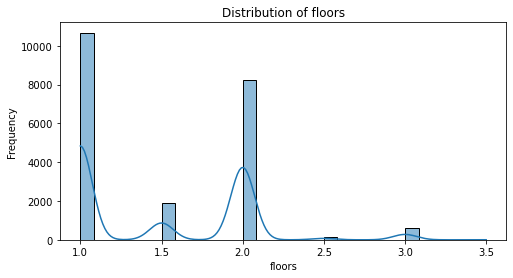

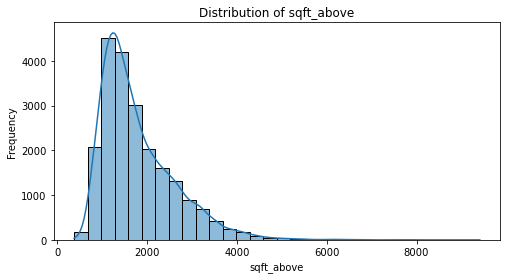

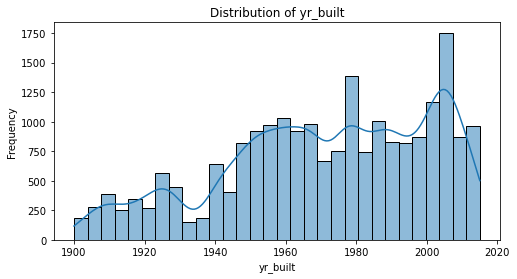

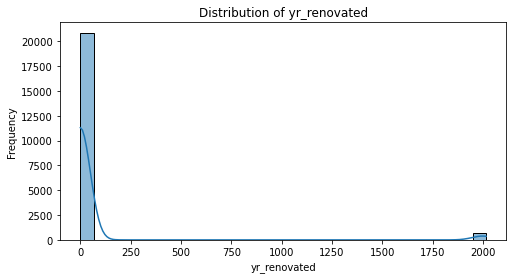

In [59]:
# univariate analysis
numerical_columns= ['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',  'sqft_above', 'yr_built', 'yr_renovated']
for col in numerical_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

**Distribution of categorical columns by value counts**

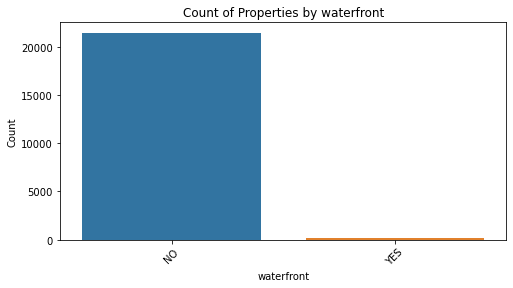

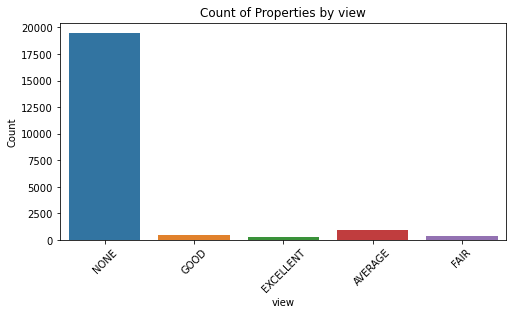

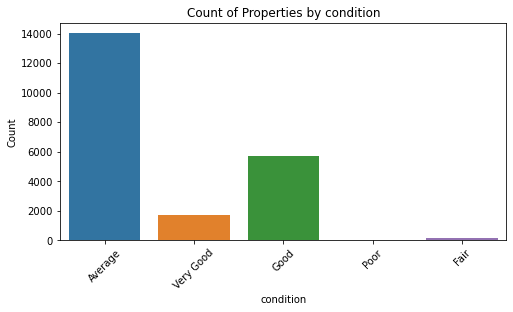

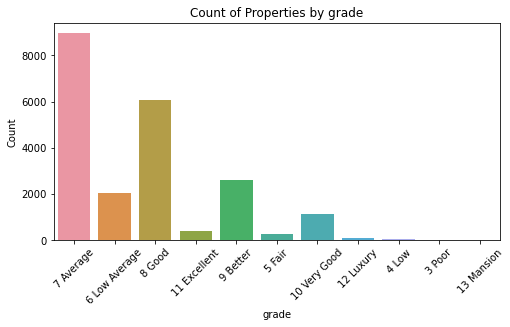

In [58]:
# Bar plot for categorical columns
categorical_columns = ['waterfront', 'view', 'condition', 'grade']
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Count of Properties by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

**Relationships between price and numerical columns**

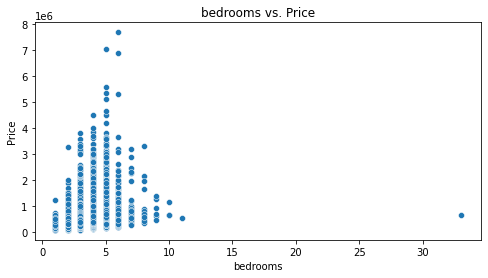

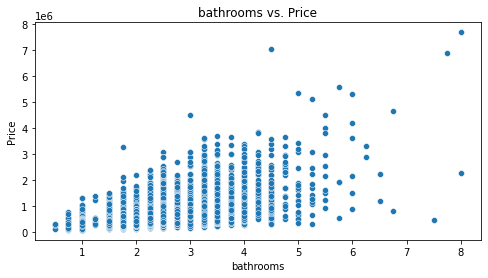

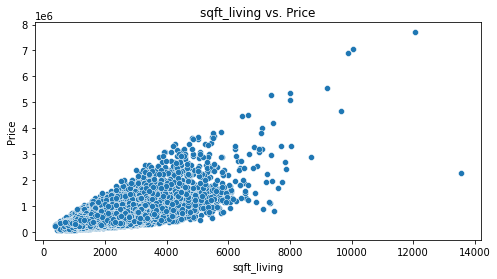

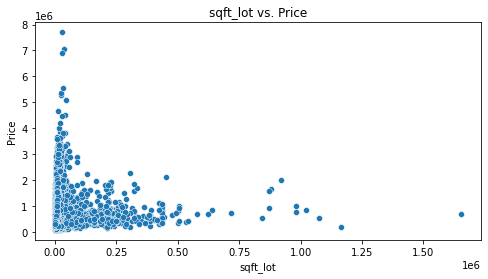

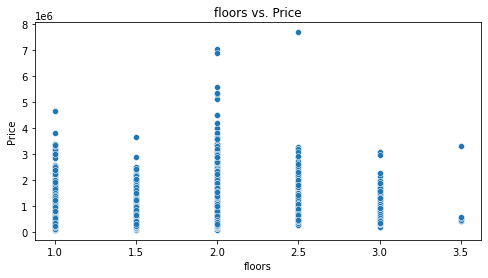

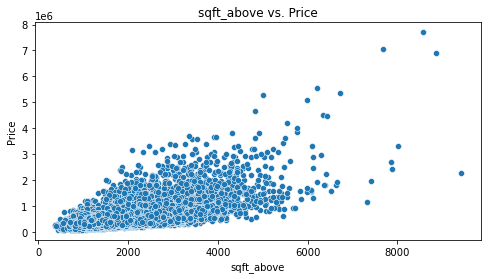

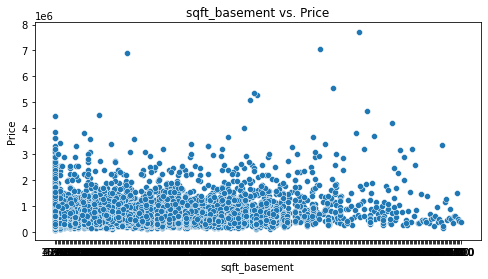

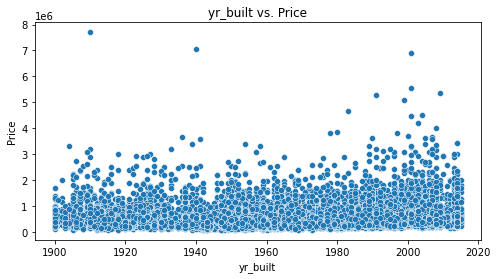

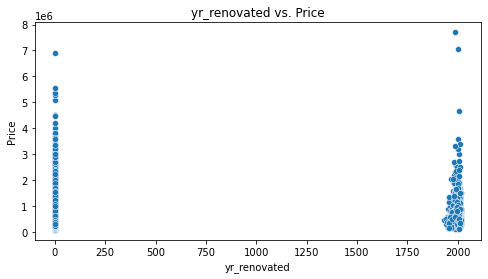

In [57]:
# Bivariate analysis
# Scatter plots for relationships between numerical columns and price
numerical_columns= ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',  'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=df, x=col, y='price')
    plt.title(f'{col} vs. Price')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

**Relationships between price and categorical columns**

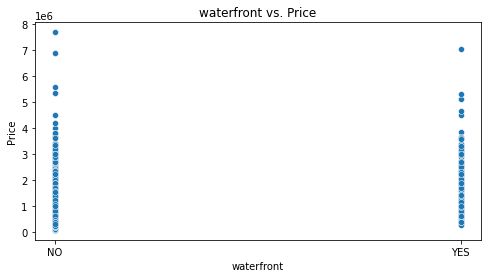

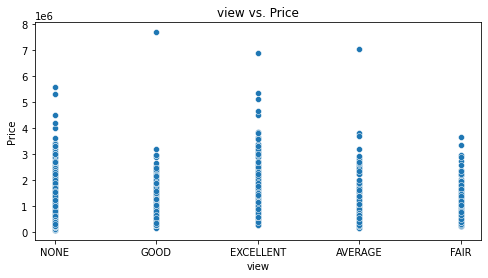

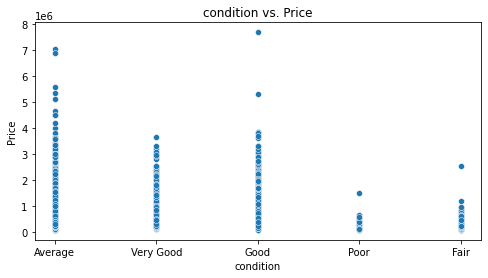

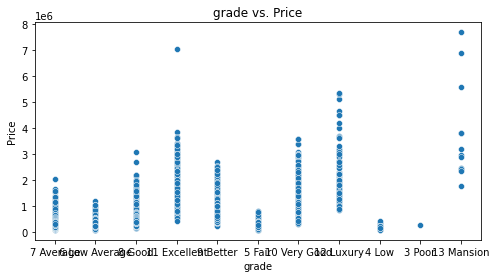

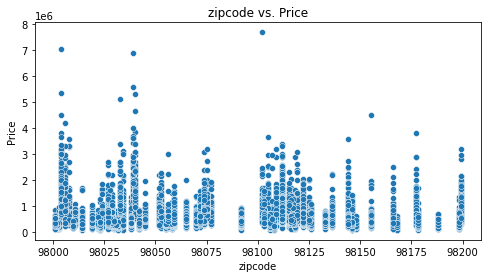

In [48]:
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=df, x=col, y='price')
    plt.title(f'{col} vs. Price')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

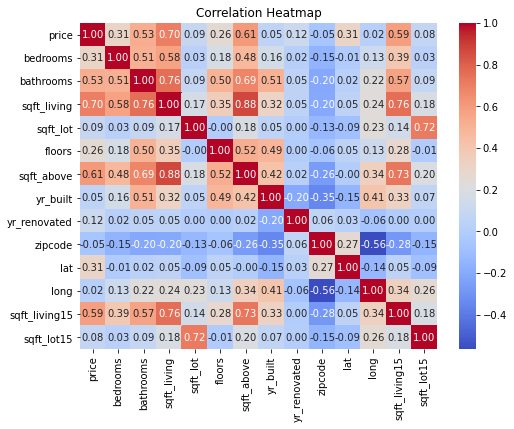

In [21]:
# Correlation matrix heatmap to check what variables are highly corrrelated
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()